# List of packages

In [6]:
import os
import itertools
import numpy as np
import scipy.io
import pandas as pd
import seaborn as sns

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization,Flatten,Conv2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

# Load Street View House Numbers (SVHN) Dataset (Format 2)

In [7]:
#load image dataset
train_dataset = scipy.io.loadmat('train_32x32.mat') 
train_extra_dataset = scipy.io.loadmat('extra_32x32.mat')
test_dataset = scipy.io.loadmat('test_32x32.mat')

# Filter dataset and label, preprocess dataset

In [8]:
X_train = train_dataset['X']
y_train = train_dataset['y']
X_extra_train = train_extra_dataset['X']
y_extra_train = train_extra_dataset['y']
X_test = test_dataset['X']
y_test = test_dataset['y']


print('Training set: ', X_train.shape, y_train.shape)
print('Training extra set: ', X_extra_train.shape, X_extra_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

# Encode target column
X_train = X_train.astype('float32')
X_extra_train = X_extra_train.astype('float32')
X_test = X_test.astype('float32')

# Scale data instance values between 0 to 1, before feeding to the neural network model
X_train /= 255
X_extra_train /= 255
X_test /= 255

X_train = X_train[np.newaxis,...]
X_train = np.swapaxes(X_train,0,4).squeeze()

X_extra_train = X_extra_train[np.newaxis,...]
X_extra_train = np.swapaxes(X_extra_train,0,4).squeeze()

X_test = X_test[np.newaxis,...]
X_test = np.swapaxes(X_test,0,4).squeeze()


np.place(y_train,y_train == 10,0)
np.place(y_extra_train,y_extra_train == 10,0)
np.place(y_test,y_test == 10,0)

y_train = keras.utils.to_categorical(y_train, 10)
y_extra_train = keras.utils.to_categorical(y_extra_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Training set:  (32, 32, 3, 73257) (73257, 1)
Training extra set:  (32, 32, 3, 531131) (32, 32, 3, 531131)
Testing set:  (32, 32, 3, 26032) (26032, 1)


# Model settings

In [9]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

# create Sequential model object
model = Sequential()

# Model architecture setting

In [10]:
#input layer with 32 nodes
model.add(Conv2D(32,(3, 3), border_mode='same',activation='relu',input_shape=(32, 32, 3))) 
model.add(BatchNormalization())

# first hidden layer with 32 nodes
model.add(Conv2D(32,(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second hidden layer with 64 nodes
model.add(Conv2D(64,(3, 3), border_mode='same',activation='relu'))
model.add(BatchNormalization())

# third hidden layer with 64 nodes
model.add(Conv2D(64,(3, 3),activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layer, Flatten serves as a connection between the convolution and dense layers
# transforms the format of the images from a 2d-array to a 1d-array
model.add(Flatten())
model.add(BatchNormalization())

# Dense is the layer to perform classification
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final Dense layer to map target class
model.add(Dense(nb_classes,activation='softmax'))

# stpes to compile model, using SGD as learning rate
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=sgd,
    metrics=['accuracy']
)

# model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

#  Model training

In [11]:
# fit model
model_history = model.fit(X_extra_train, y_extra_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1,
          shuffle=True,validation_split=0.25,
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Instructions for updating:
Use tf.cast instead.


C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.
Instructions for updating:
Use tf.cast instead.


Train on 398348 samples, validate on 132783 samples
Epoch 1/20
398348/398348 [==============================] - 5146s 13ms/step - loss: 0.2969 - acc: 0.9114 - val_loss: 0.1245 - val_acc: 0.9637
Epoch 2/20
398348/398348 [==============================] - 3613s 9ms/step - loss: 0.1503 - acc: 0.9559 - val_loss: 0.1159 - val_acc: 0.9660
Epoch 3/20
398348/398348 [==============================] - 3346s 8ms/step - loss: 0.1234 - acc: 0.9643 - val_loss: 0.0806 - val_acc: 0.9774
Epoch 4/20
398348/398348 [==============================] - 4374s 11ms/step - loss: 0.1096 - acc: 0.9684 - val_loss: 0.0794 - val_acc: 0.9780
Epoch 5/20
398348/398348 [==============================] - 4973s 12ms/step - loss: 0.1000 - acc: 0.9716 - val_loss: 0.0722 - val_acc: 0.9801
Epoch 6/20
398348/398348 [==============================] - 3713s 9ms/step - loss: 0.0926 - acc: 0.9739 - val_loss: 0.0660 - val_acc: 0.9824
Epoch 7/20
398348/398348 [==============================] - 3725s 9ms/step - loss: 0.0876 - acc: 0.

# Performance matrix on Training and Validation dataset

In [35]:
# Performance matrix 
hist = pd.DataFrame(model_history.history)
hist['epoch'] = model_history.epoch
hist

,val_loss,val_acc,loss,acc,epoch
0,0.124503,0.963670,0.296928,0.911366,0
1,0.115862,0.965997,0.150297,0.955898,1
2,0.080619,0.977422,0.123382,0.964290,2
3,0.079411,0.978032,0.109583,0.968420,3
4,0.072179,0.980058,0.100002,0.971630,4
5,0.066021,0.982385,0.092600,0.973935,5
6,0.067552,0.981526,0.087645,0.975024,6
7,0.062574,0.983507,0.084014,0.976588,7
8,0.083244,0.976511,0.078676,0.977831,8
9,0.059123,0.984629,0.075923,0.978865,9


# Graph: Training and Validation dataset performance

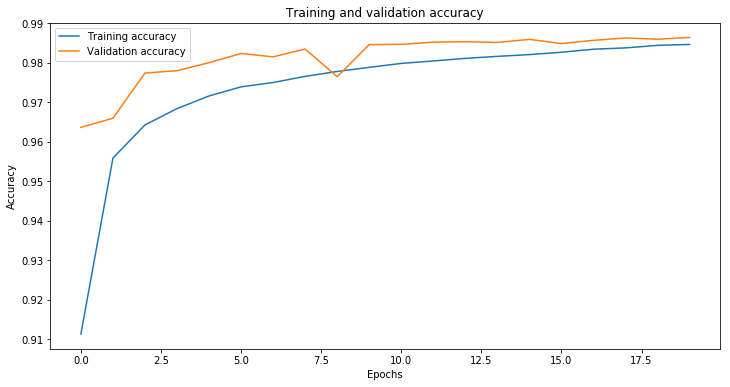

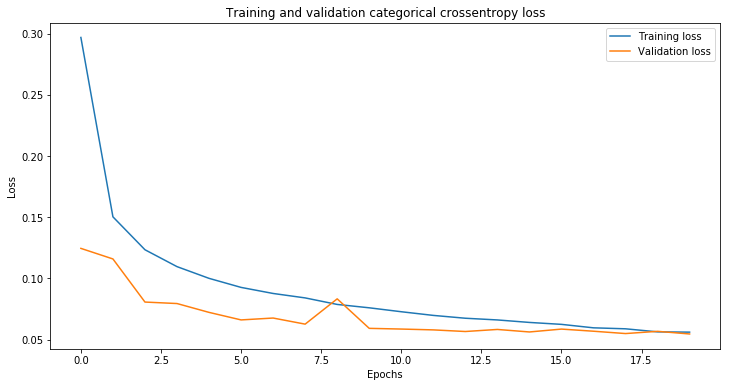

In [65]:
# Graph: Training and Validation dataset performance

plt.rcParams['figure.figsize'] = (12.0, 6.0)

def plot_cnn_performance(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Training accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Validation accuracy')
    plt.legend()
  

    plt.figure()
    plt.xlabel('Epochs')
    plt.title('Training and validation categorical crossentropy loss')
    plt.plot(hist['epoch'], hist['loss'],label='Training loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


plot_cnn_performance(model_history)

# Evaluate model performance on Test dataset

In [14]:
#Evaluate model performance on Test dataset

test_loss, test_accuracy= model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:',test_accuracy)

26032/26032 [==============================] - 47s 2ms/step
Test Loss: 0.1548489878761162
Test Accuracy: 0.9638137676705593


# Make predictions on Test Dataset

In [50]:
prediction_array = model.predict(X_test)
predicted_class = np.argmax(prediction_array, axis=1)

# Graph: Plot the first X test images, their predicted label, and the true label

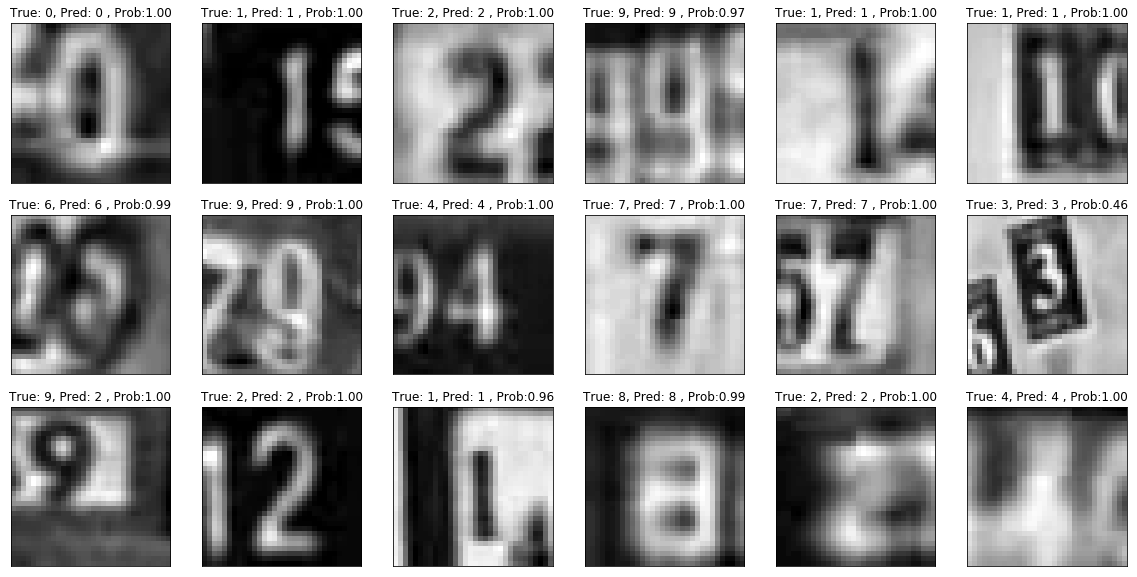

In [62]:
# Plot function 
def plot_predicted_label(images, nrows, ncols, cls_true, cls_pred,prediction_array):
    fig, axes = plt.subplots(nrows, ncols,figsize=(20, 10))
    
    rs = np.random.choice(images.shape[0], nrows*ncols)
    
    for i, ax in zip(rs, axes.flat):
        prob = round(prediction_array[i][cls_pred[i]],2)
        title = 'True: %s, Pred: %s , Prob:%0.2f' % (np.argmax(cls_true[i]),cls_pred[i],prob)
        ax.imshow(images[i,:,:,0], cmap='binary')
        ax.set_title(title)
         
        ax.set_xticks([])
        ax.set_yticks([])


# ploat image with predicted and actual value
num_rows = 3
num_cols = 6
plot_predicted_label(X_test,num_rows, num_cols, y_test,predicted_class,prediction_array);

# Save entire model to a HDF5 file

In [17]:
# Save entire model to a HDF5 file
model.save('ML_Assin4_CNN_Model.h5')